Comparison results by model and anomaly type:
            Model Anomaly_Type  Wasserstein_Distance  \
0        Combined         DDoS              2.069141   
1        Combined    Intrusion              3.131922   
2        Combined      Malware              3.811625   
3           ARIMA         DDoS              6.313331   
4           ARIMA    Intrusion              5.520140   
5           ARIMA      Malware              7.356822   
6   Random Forest         DDoS              7.049775   
7   Random Forest    Intrusion              8.428907   
8   Random Forest      Malware             10.506731   
9             SVM         DDoS              7.724050   
10            SVM    Intrusion             10.122360   
11            SVM      Malware             12.414420   

    Jensen_Shannon_Divergence  
0                    0.117811  
1                    0.153623  
2                    0.170752  
3                    0.394547  
4                    0.337360  
5                    0.447383  
6

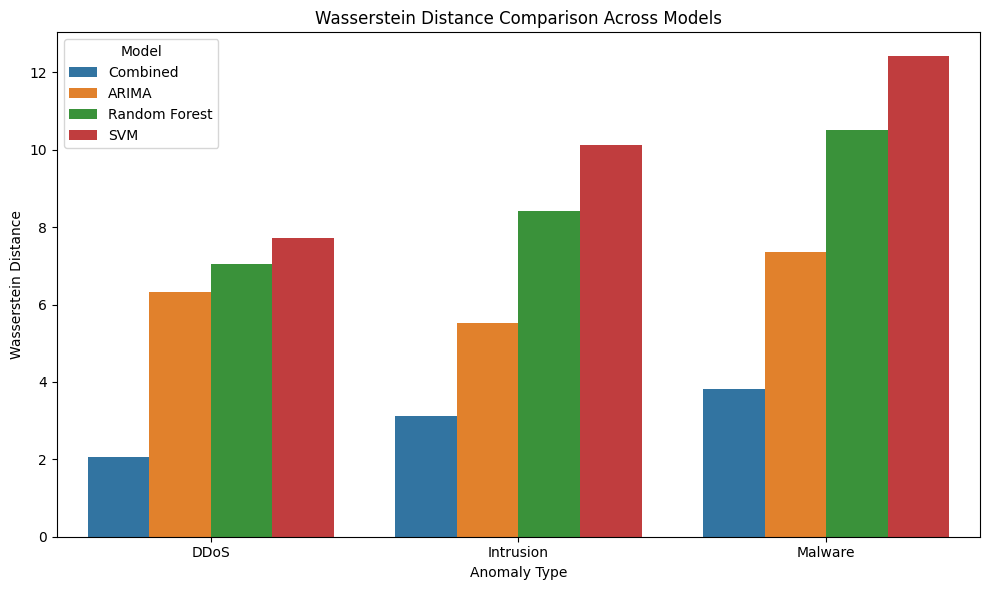

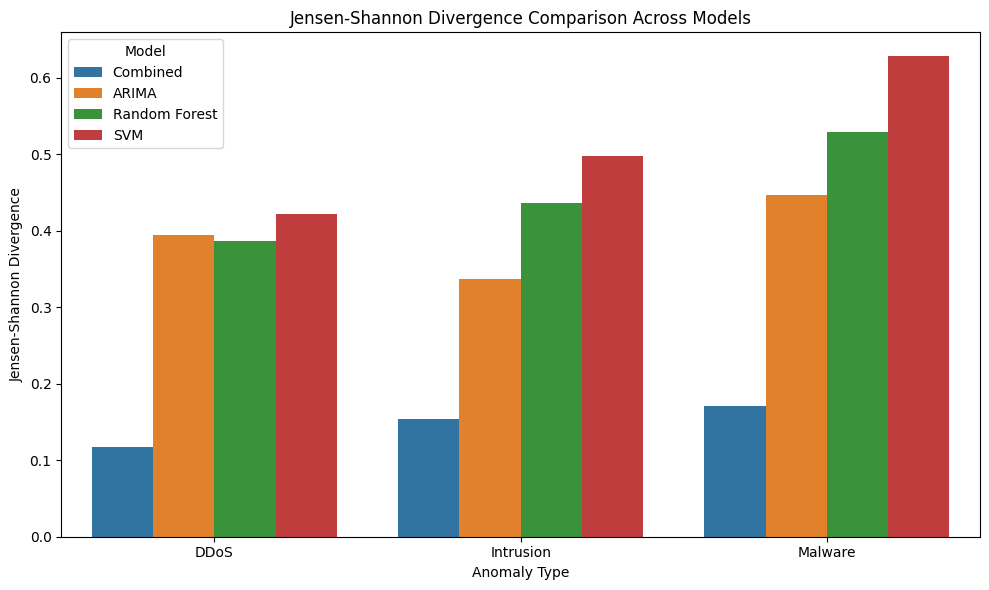

In [ ]:
import pandas as pd
import numpy as np
import ast
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import jensenshannon
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path, model_name):
    """
    Load a CSV file containing predictions and extract the anomaly type.
    The "Pair" column is expected to contain a string representation of a list,
    with the anomaly type as the second element.
    """
    df = pd.read_csv(file_path)
    # Convert the "Pair" string to a Python list if needed
    df['Pair'] = df['Pair'].apply(lambda x: ast.literal_eval(x) if x.strip().startswith('[') else x)
    df['Anomaly_Type'] = df['Pair'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)
    df['Model'] = model_name
    return df

def compute_histogram_distribution(scores, bins, eps=1e-8):
    """
    Compute a normalized histogram (probability distribution) for a set of scores.
    """
    counts, _ = np.histogram(scores, bins=bins)
    counts = counts + eps  # add small value to ensure numerical stability
    return counts / counts.sum()

# Define the list of prediction files from different models.
# Adjust the file paths as needed.
model_files = {
    "Combined": "/content/combined_pairwise_predictions.csv",
    "ARIMA": "/content/arima_predictions.csv",
    "Random Forest": "/content/random_forest_predictions.csv",
    "SVM": "/content/svm_predictions.csv"   ,
}

# Load predictions from each model and combine them into a single DataFrame.
dfs = []
for model, file_path in model_files.items():
    dfs.append(load_data(file_path, model))
df_predictions = pd.concat(dfs, ignore_index=True)

# Load the reference (pre-gap) data.
# This file should have a similar structure with a "Pair" column and a score column.
# We assume the reference scores are stored in a column named "PreGap_Score".
df_ref = pd.read_csv("/content/pair_wise_anomaly_predictions.csv")
df_ref['Pair'] = df_ref['Pair'].apply(lambda x: ast.literal_eval(x) if x.strip().startswith('[') else x)
df_ref['Anomaly_Type'] = df_ref['Pair'].apply(lambda x: x[1] if isinstance(x, list) and len(x) > 1 else None)

# Calculate the WD and JSD metrics for each model and anomaly type.
results = []
num_bins = 20

for model in df_predictions['Model'].unique():
    df_model = df_predictions[df_predictions['Model'] == model]
    for anomaly in df_model['Anomaly_Type'].unique():
        pred_scores = df_model[df_model['Anomaly_Type'] == anomaly]['Predicted_Anomaly_Score'].values
        ref_scores = df_ref[df_ref['Anomaly_Type'] == anomaly]['Predicted_Anomaly_Score'].values
        if len(pred_scores) == 0 or len(ref_scores) == 0:
            continue
        # Use the combined range of scores to define common bins
        all_scores = np.concatenate([pred_scores, ref_scores])
        bins = np.linspace(all_scores.min(), all_scores.max(), num_bins)
        hist_pred = compute_histogram_distribution(pred_scores, bins)
        hist_ref = compute_histogram_distribution(ref_scores, bins)
        wd = wasserstein_distance(pred_scores, ref_scores)
        jsd = jensenshannon(hist_pred, hist_ref)
        results.append({
            "Model": model,
            "Anomaly_Type": anomaly,
            "Wasserstein_Distance": wd,
            "Jensen_Shannon_Divergence": jsd
        })

df_results = pd.DataFrame(results)
print("Comparison results by model and anomaly type:")
print(df_results)

# Plot the results.
# Plotting the Wasserstein Distance comparison.
plt.figure(figsize=(10,6))
sns.barplot(data=df_results, x="Anomaly_Type", y="Wasserstein_Distance", hue="Model")
plt.title("Wasserstein Distance Comparison Across Models")
plt.xlabel("Anomaly Type")
plt.ylabel("Wasserstein Distance")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

# Plotting the Jensen-Shannon Divergence comparison.
plt.figure(figsize=(10,6))
sns.barplot(data=df_results, x="Anomaly_Type", y="Jensen_Shannon_Divergence", hue="Model")
plt.title("Jensen-Shannon Divergence Comparison Across Models")
plt.xlabel("Anomaly Type")
plt.ylabel("Jensen-Shannon Divergence")
plt.legend(title="Model")
plt.tight_layout()
plt.show()


In [ ]:
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 62.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
!pip install numpy --upgrade --ignore-installed

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 91.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
node2vec 0.5.0 requires numpy<2.0.0,>=1.24.0, but you have numpy 2.2.4 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [ ]:
# Upgrade pip and NumPy
!pip install --upgrade pip
!pip install --upgrade numpy

# Verify NumPy installation
import numpy as np
print(np.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 96.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
node2vec 0.5.0 requires numpy<2.0.0,>=1.24.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
2.0.2


In [ ]:
# First, downgrade numpy to a compatible version
!pip install numpy==1.24.3

# Then install other dependencies
!pip install scipy pandas

# If you need other specific versions
!pip install gensim==4.3.2
!pip install node2vec==0.4.0
!pip install numba==0.59.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 94.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 wh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 120.7 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.3
    Uninstalling gensim-4.3.3:
      Successfully uninstalled gensim-4.3.3
  Preparing metadata (setup.py) ... canceled
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 106, in _run_wrapper
    status = _inner_run()
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 97, in _inner_run
    return self.run(options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 386, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^

In [ ]:
import os
os._exit(00)


In [ ]:
!pip uninstall numpy -y
!pip install numpy==1.24.3


Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 66.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.24.3 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requires 

In [ ]:
!pip uninstall numpy scipy -y
!pip install numpy==1.24.3 scipy==1.10.1


Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Successfully uninstalled numpy-1.24.3
Found existing installation: scipy 1.14.1
Uninstalling scipy-1.14.1:
  Successfully uninstalled scipy-1.14.1
  Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.8 MB/s eta 0:00:00
Using cached numpy-1.24.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 15.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.1 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.3 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.24.3 whic

In [ ]:
import numpy as np
print(np.__version__)


1.24.3


In [ ]:
!pip install node2vec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 72.7 MB/s eta 0:00:00


In [ ]:
import os
os._exit(00)


In [ ]:
import node2vec
print("Node2Vec is installed successfully!")


Node2Vec is installed successfully!


In [ ]:

import pandas as pd
import numpy as np
import networkx as nx
from node2vec import Node2Vec
from scipy.stats import spearmanr, pearsonr, wasserstein_distance
from scipy.spatial.distance import jensenshannon

def load_and_merge_predictions(file_dict):
    """
    Load and merge predictions from multiple CSV files based on the common 'Pair' column.
    """
    merged_df = None
    for model_name, file_path in file_dict.items():
        df = pd.read_csv(file_path)
        df = df.rename(columns={df.columns[1]: model_name})  # Rename prediction column to model name

        if merged_df is None:
            merged_df = df
        else:
            merged_df = pd.merge(merged_df, df, on='Pair', how='inner')

    return merged_df

def compute_correlation(predictions_df, model1, model2):
    """
    Computes Pearson & Spearman correlation between two models.
    """
    pearson_corr, _ = pearsonr(predictions_df[model1], predictions_df[model2])
    spearman_corr, _ = spearmanr(predictions_df[model1], predictions_df[model2])
    return {'Pearson Correlation': pearson_corr, 'Spearman Correlation': spearman_corr}

def compute_wd_jsd(predictions_df, model1, model2):
    """
    Computes Wasserstein Distance and Jensen-Shannon Divergence between two models.
    """
    wd = wasserstein_distance(predictions_df[model1], predictions_df[model2])
    p = np.histogram(predictions_df[model1], bins=20, density=True)[0] + 1e-8
    q = np.histogram(predictions_df[model2], bins=20, density=True)[0] + 1e-8
    jsd = jensenshannon(p, q)
    return {'Wasserstein Distance': wd, 'Jensen-Shannon Divergence': jsd}

def temporal_consistency(predictions_df, model, lag=1):
    """
    Computes auto-correlation to check temporal stability of model predictions.
    """
    return predictions_df[model].autocorr(lag=lag)

def compute_ensemble(predictions_df, model_list):
    """
    Computes the mean ensemble prediction from multiple models.
    """
    predictions_df['Ensemble_Prediction'] = predictions_df[model_list].mean(axis=1)
    return predictions_df

def rank_models(predictions_df, model_list):
    """
    Ranks models based on correlation, divergence, and stability.
    """
    rankings = {}
    for model in model_list:
        avg_corr = np.mean([compute_correlation(predictions_df, model, m)['Pearson Correlation'] for m in model_list if m != model])
        avg_divergence = np.mean([compute_wd_jsd(predictions_df, model, m)['Wasserstein Distance'] for m in model_list if m != model])
        stability = temporal_consistency(predictions_df, model)
        rankings[model] = {'Avg Correlation': avg_corr, 'Avg WD': avg_divergence, 'Stability': stability}
    return pd.DataFrame(rankings).T.sort_values(by=['Avg Correlation', 'Stability'], ascending=[False, False])

def main(file_dict, output_file='ranked_models.csv'):
    """
    Main function to load, merge, evaluate, and rank models.
    """
    predictions_df = load_and_merge_predictions(file_dict)
    model_list = list(file_dict.keys())
    predictions_df = compute_ensemble(predictions_df, model_list)
    rankings = rank_models(predictions_df, model_list)
    rankings.to_csv(output_file, index=True)
    print(f"Model rankings saved to {output_file}")
    return rankings

# Example usage:
# Example usage:
file_dict = {
    'LSTM_Predictions': '/content/merged_predictions.csv', # Changed to filepath strings
    'ARIMA_Predictions': '/content/arima_predictions.csv', # Changed to filepath strings
    'RF_Predictions': '/content/random_forest_predictions.csv', # Changed to filepath strings
    'SVM_Predictions': '/content/svm_predictions.csv' # Changed to filepath strings
}

ranked_results = main(file_dict)


Model rankings saved to ranked_models.csv
